In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

**Dataset**

In [132]:
url = 'https://raw.githubusercontent.com/Iva-Cvetkovska/abalone-classification-ml/main/abalone.data'
abalone_ds = pd.read_csv(url)
# df shows the whole table of 4177 entries
abalone_ds.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


Data analysis

In [133]:
abalone_ds.describe() # Shows statistics for all variables

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [134]:
abalone_ds.isna().sum() # isna() method checks whether the objects contain missing or null values (NA, NaN)

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [135]:
abalone_ds["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

Visualization

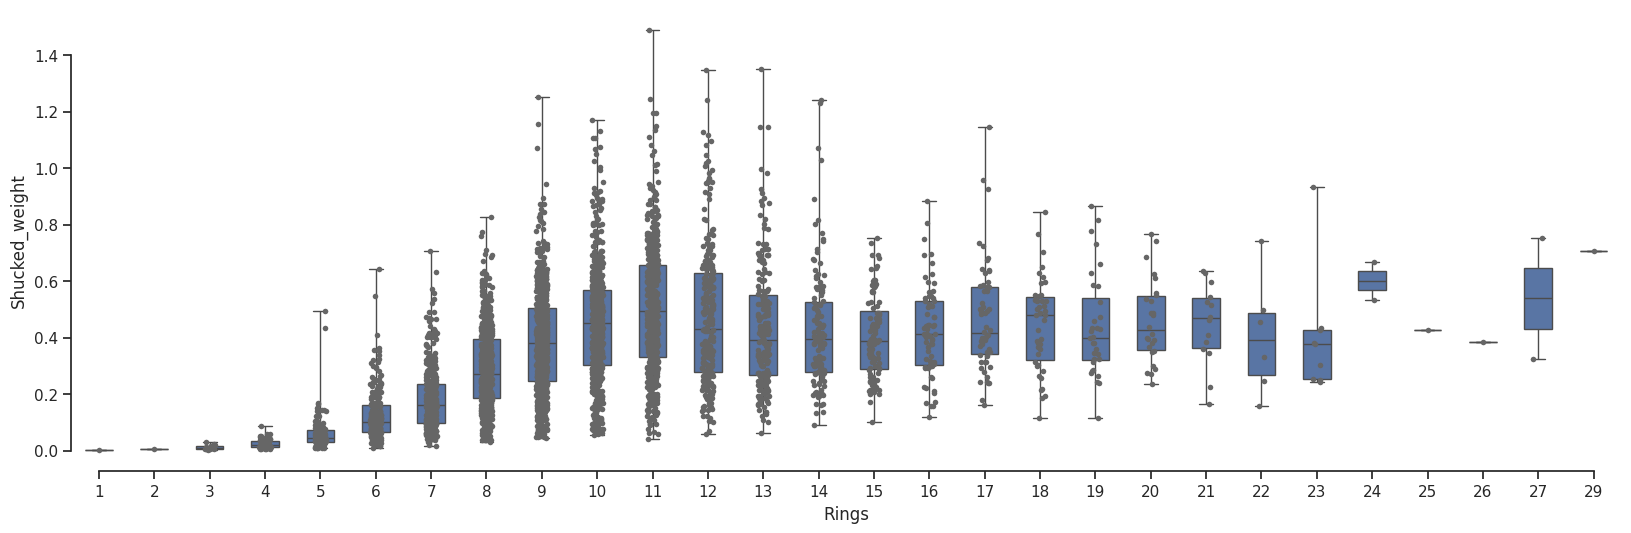

In [136]:
# Boxplot
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(abalone_ds, x="Rings", y="Shucked_weight", whis=[0, 100], width=.5)
sns.stripplot(abalone_ds, x="Rings", y="Shucked_weight", size=4, color=".4")
sns.despine(trim=True)

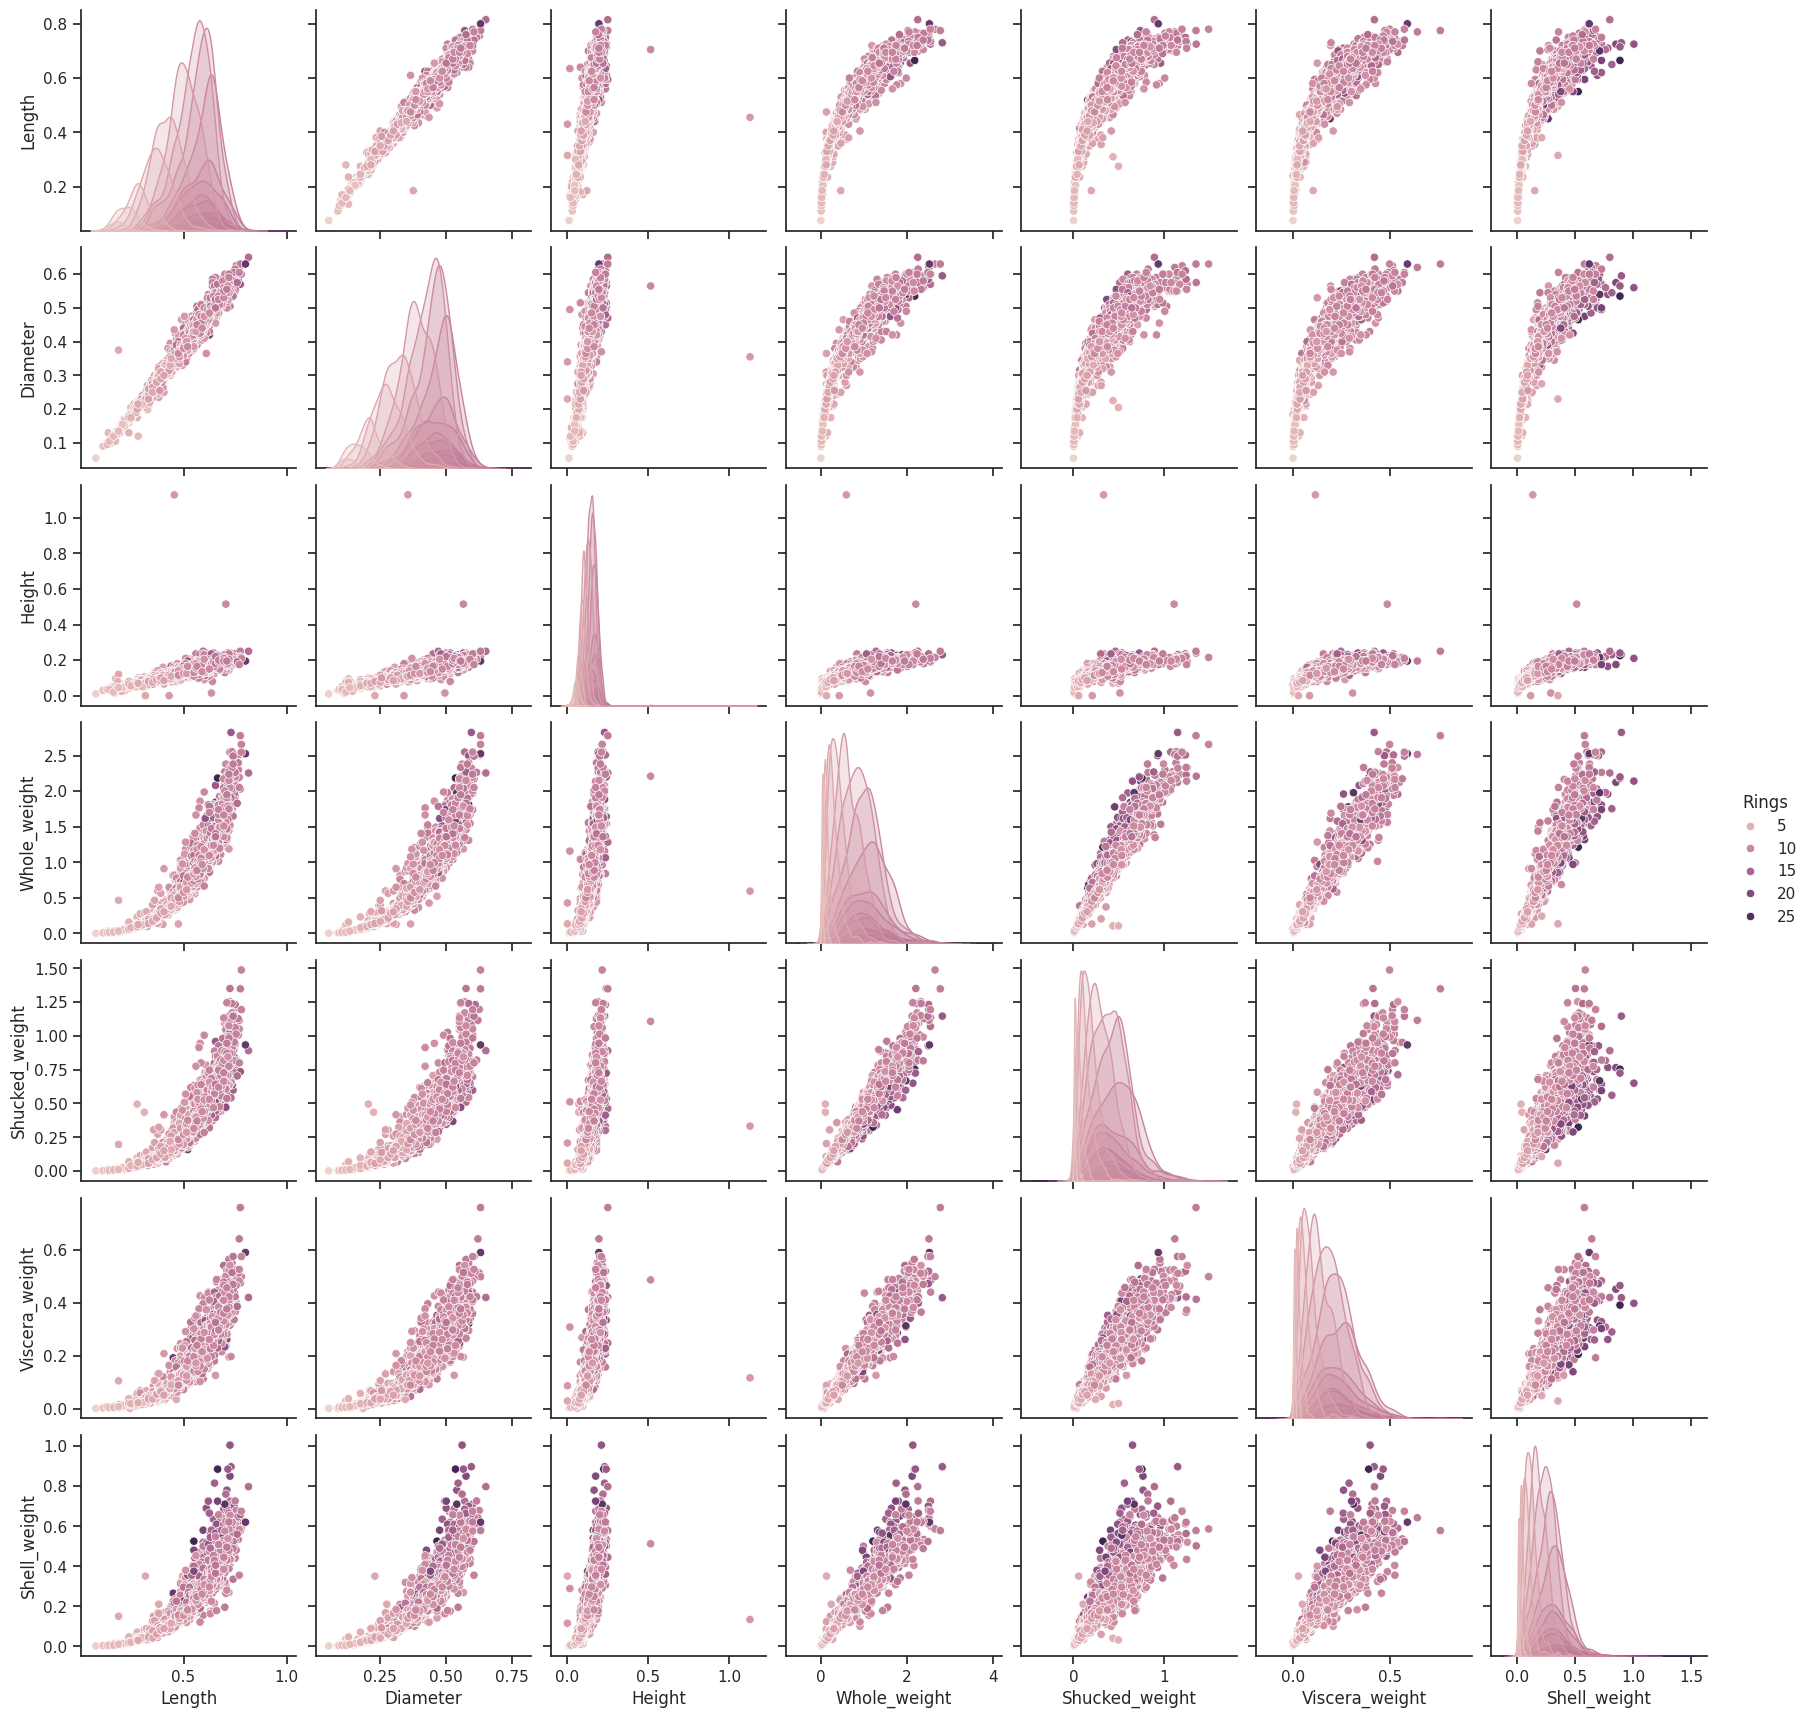

In [137]:
# Pairplot
sns.set_theme(style="ticks")
sns.pairplot(abalone_ds, hue="Rings")

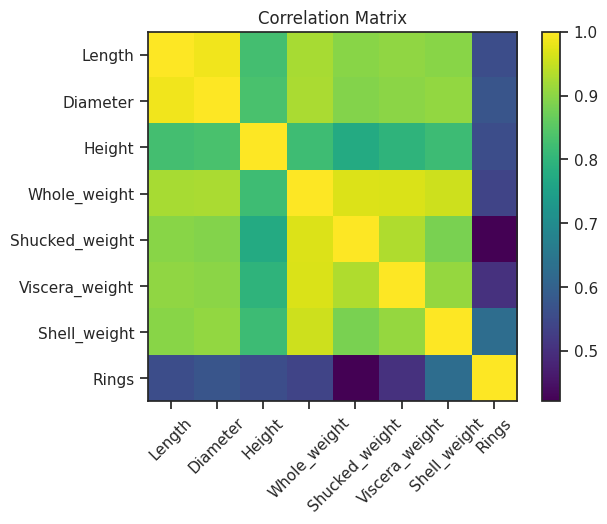

In [138]:
# Pearson Correlation Coefficient
number_of_features = abalone_ds.shape[1] - 2 # Removing Rings from the result as well as Sex
x = abalone_ds.iloc[:, 1:-1].values # Remove the first column as it is not a scalar and the last target column Rings
rings_values = abalone_ds['Rings'].values

correlation_matrix = np.zeros((number_of_features+1,number_of_features+1))

for feature_i in range(number_of_features):
    for feature_j in range(number_of_features):
        corr, _ = stats.pearsonr(x[:,feature_i], x[:,feature_j])
        correlation_matrix[feature_i][feature_j] = corr

for feature_i in range(number_of_features):
    target_i = number_of_features
    corr, _ = stats.pearsonr(x[:,feature_i], rings_values)
    correlation_matrix[feature_i][target_i] = corr
    correlation_matrix[target_i][feature_i] = corr

corr, _ = stats.pearsonr(rings_values, rings_values)
correlation_matrix[target_i][target_i] = corr
corr, _ = stats.pearsonr(x[:,feature_i], rings_values)

attribute_names = list(abalone_ds.columns)[1:-1]
attribute_names_with_target = attribute_names + ['Rings']

plt.figure()
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(attribute_names_with_target)), attribute_names_with_target, rotation=45)
plt.yticks(np.arange(len(attribute_names_with_target)), attribute_names_with_target)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

In [139]:
LDA_reduce = LinearDiscriminantAnalysis(n_components=2)
LDA_reduce.fit(x, rings_values)
x_reduced = LDA_reduce.transform(x)

Classification

In [140]:
X_train, X_test, y_train, y_test = train_test_split(x, rings_values, test_size=0.3, random_state=42)
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(x_reduced, rings_values, test_size=0.3, random_state=42)

QDA

In [141]:
# Filter out classes that have only one sample
unique_classes, class_counts = np.unique(y_train, return_counts=True)
classes_with_one_sample = unique_classes[class_counts == 1]
mask = np.isin(y_train, classes_with_one_sample)
X_train_filtered = X_train[~mask]
y_train_filtered = y_train[~mask]

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train_filtered, y_train_filtered)
print("Приорните веројатности на класите се",QDA.priors_)

Приорните веројатности на класите се [0.00411241 0.01302262 0.02398903 0.06237149 0.08978753 0.13845099
 0.16346813 0.15181631 0.11994517 0.06271419 0.05140507 0.03152844
 0.02467443 0.01576422 0.01507882 0.00925291 0.00822481 0.00685401
 0.00376971 0.0010281  0.0013708  0.0006854  0.0006854 ]


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [142]:
y_pred = QDA.predict(X_test)
QDA_accuracy = accuracy_score(y_test, y_pred)

print("Точноста на класификацијата со методот QDA е",round(QDA_accuracy,3))

Точноста на класификацијата со методот QDA е 0.223


LDA

In [143]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
LDA_accuracy = accuracy_score(y_test, y_pred)

print("Точноста на класификацијата со методот LDA е",round(LDA_accuracy,3))

Точноста на класификацијата со методот LDA е 0.274


Bayes

In [144]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
GNB_accuracy = accuracy_score(y_test, y_pred)

print("Точноста на класификацијата со Гаусовиот наивен Баесов класификатор е",round(GNB_accuracy,3))

Точноста на класификацијата со Гаусовиот наивен Баесов класификатор е 0.244
